1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

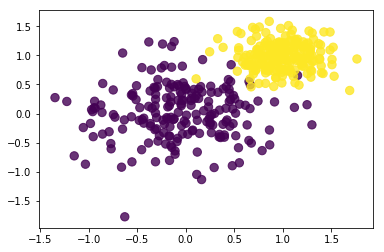

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

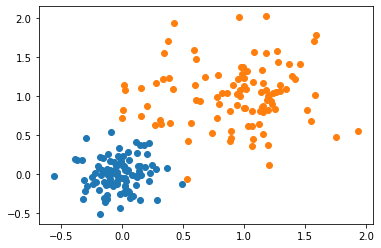

In [3]:
def create_dataset(mean, dev) : 
    return np.random.normal(mean, dev, 100)

x = create_dataset(0,0.2)
y = create_dataset(0,0.2)
x1 = create_dataset(1,0.4)
y1 = create_dataset(1, 0.4)
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.show()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

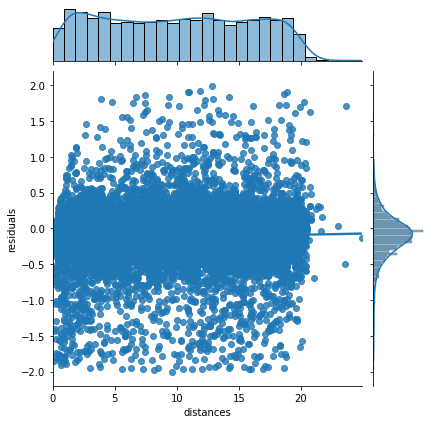

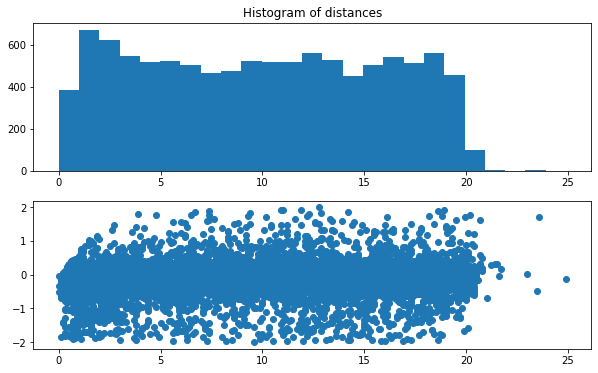

x:  [ 0.498  1.494  2.49   3.486  4.482  5.478  6.474  7.47   8.466  9.462
 10.458 11.454 12.45  13.446 14.442 15.438 16.434 17.43  18.426 19.422
 20.418 21.414 22.41  23.406 24.402]
y:  [-0.17741625 -0.16443112 -0.1658957  -0.13991807 -0.13111217 -0.13870514
 -0.08177473 -0.07684108 -0.09287516 -0.08186267 -0.06862386 -0.07887296
 -0.11057065 -0.15250783 -0.16292593 -0.09894624 -0.1663715  -0.13499576
 -0.09807412 -0.03306406  0.223125    0.14222222  0.02857143  0.605
  0.          0.        ]
err_y: [0.46132276 0.42045288 0.40814875 0.4259821  0.36564381 0.44759674
 0.46796179 0.4011405  0.44126111 0.41947632 0.45920728 0.47637174
 0.49746641 0.44487415 0.46290168 0.46362994 0.40788806 0.41705574
 0.39428075 0.40292526 0.45826737 0.13666215 0.         1.105
 0.         0.        ]


In [110]:
#-----------first part--------------
infile = pd.read_pickle('data/E07/residuals_261.pkl')
new_dict = dict(infile.item())
data = pd.DataFrame(new_dict)
#print(data)
mask = abs(data['residuals'])<2
final = data[mask]
sns.jointplot(x ='distances' , y = 'residuals',data = final, kind = "reg")
plt.show()

#we can see from the graph as residual has a gaussian pdf meanwhile the distances has quite uniform

#-----------second part--------------
fig, ax = plt.subplots(2,1,figsize=(10, 6))
ax[0].set_title('Histogram of distances')
h,bins,_ = ax[0].hist(final['distances'],bins = 25)
x = 0.5*(bins[1:]+bins[:-1])
y = np.zeros(len(bins))
err_y = np.zeros(len(bins))
for i in range(0,len(x)-1):
    mask_i = (final['distances']>x[i]) & (final['distances']<x[i+1])
    y[i] = np.mean(final[mask_i].residuals)
    err_y[i] = np.std(final[mask_i].residuals)
ax[1].scatter(final['distances'],final['residuals']) 
plt.show()
print("x: ",x)
print("y: ",y)
print("err_y:", err_y)

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


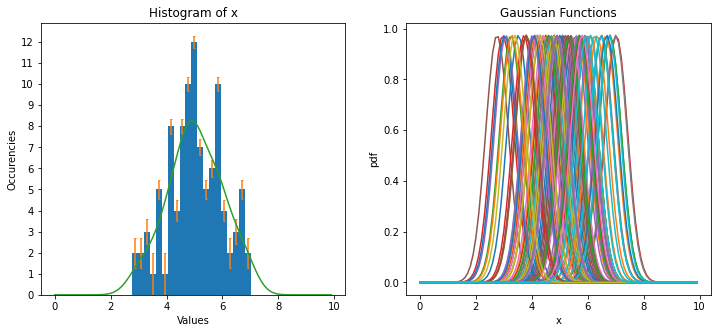

In [116]:
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm
from scipy import integrate
#-----------first part--------------
N = 100
mean = 5 
std = 1
x = np.random.normal(mean,std,N)
fig, (a,b) = plt.subplots(1,2,figsize=(12,5))
a.set_title('Histogram of x')
a.set_xlabel('Values')
a.set_ylabel('Occurencies')
a.yaxis.set_major_locator(MultipleLocator(1.0))
ni,bins,_ = a.hist(x,bins = 20)
bi = 0.5*(bins[1:]+bins[:-1])
poisson=[]
for i in range(len(ni)):
    if ni[i]!=0:
        poisson.append(1/np.sqrt(ni[i]))
    else:
        poisson.append(0)
a.errorbar(bi,ni,poisson,fmt='none',capsize=1)

#-----------second part--------------
b.set_title('Gaussian Functions')
b.set_xlabel('x')
b.set_ylabel('pdf')
axis = np.arange(0, 10, 0.1)
std = 1.06*x.std()*(x.size**(-1/5))
t_sum = 0
for i in x:
    norm_i= norm.pdf(axis,i,std)
    plt.plot(axis,norm_i)
    t_sum+=norm_i
#-----------third part--------------
integral_compute = integrate.trapz(t_sum,axis)
area_hist = 0
for i in range(0,len(bins)-1):
    area_hist+=ni[i]*(bins[i+1]-bins[i])
normalize_integral = t_sum*(area_hist/integral_compute)
a.plot(axis,normalize_integral)  
plt.show()